# Project 2D

##### Kendal Johnson-Ellenbeck 

### Scientific Question: How does exclusively breastfeeding affect the diversity of bacterium, like Bacteroidetes and Firmicutes, in the gut microbiome, and what is the correlation with the development of diarrhea-related gut microbiota dysbiosis? 

Exclusive breastfeeding has been shown to lower the diversity of the bacterium within the gut microbiome. Bacteroidetes and Firmicutes alike have a beneficial relationship with the host that they are in by sensing and adapting to nutrient availability as well as influence the immune system to combat other pathogens. (Wexler, 2007) Dysbiosis is a condition that is caused by an imbalance in the microbiome of the human gut. This condition affets the gut ecosystem and therefore can lead to conditions like diarrhea, indigestion, etc. (Li et al., 2021)

The effect of breastfeeding on the development of the gut microbiome is a highly researched topic. While specifically looking at the idea of Bacteroidetes and Firmicutes on the development of dysbiosis, a specific article was found: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6177445/#MOESM1. Along with this, there was a link to the Github data that could be accessed: https://github.com/nhanhocu/metamicrobiome_breastfeeding. As stated on the Github page "readme" section the data shows a:  

"Meta-analysis of the effects of exclusive breastfeeding on infant gut microbiome across studies and populations". 

### Scientific Hypothesis: If infants are exclusively breastfed, then they will have a lower amount of Bacteroidetes and Firmicutes in infants’ gut microbiome which correlates with a reduced amount of diarrhea-related gut microbiota dysbiosis. 

The data was downloaded into R studio because this was the only format it was available in. From there, the data was converted from an .rda file into a .csv file. For example, the file alphamalb.rda was converted to a .csv file by using the command: write.csv(alphamalb.rda,'alphamalb.csv'). Once all the necessary .rda files were converted to .csv, the calculations could start in jupyter notebook.

The lower amount of Bacteriodetes and Firmicutes as well as the amount of general diversity in the infants' gut microbiome between being exclusively breastfed and non-exclusively breastfed was tested using a T-test, in which p-values were generated to compare to a significance level of .05.  

Data was then used to see what effect exclusively breastfeeding vs. non-exclusively breastfeeding had on the generation of diarrhea-related gut microbiota dysbiosis. This was done by using a deep neural network as well as visualization via a scatter plot. 

In summary, to answer this scientific question and test my hypothesis: I downloaded the corresponding data from Github, uploaded it to R studio to get a .csv, and then I tested the data using various bioinformatics methods and a visualization method. 

### Part 1: Load the Packages

Packages included the following: 
- Pandas: Pandas is a package that makes working with "relational" or "tablular" data fast, easy, and inbuilt. Pandas can be found for 2 different types of data structures: Series, which works for 1-dimensional, homogenous-type arrays and DataFrame, which works for 2-dimensional heterogenous-type columns. Some of the things pandas can accomplish are: handle missing data (NaN) points, insert/delete columns from DataFrame, merge/join data sets, and much more. To learn more about Pandas, visit their informational page: https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html. 

- Numpy: Numpy allows for scientific computation in the Python language. It provides tools for work on n-dimensional arrays. Numpy can do a variety of tasks including, but not limited to: advanced mathematical operations on a large chunk of data, reshaping of arrays, and indexing arrays by Boolean and integer values. The only stipulation is these arrays have a fixed size from creation. To learn more about Numpy, visit their informational page: https://numpy.org/doc/stable/user/whatisnumpy.html. 

- SciPy: Scipy is built on the Numpy extension. It allows for the manipulation and visualization of scientific data. Scipy has a lot of subpackages: cluster, integrate, optimize and stats just to name a few.  Overall, Scipy contains fully functional versions of the code from Numpy and is able to solve problems, like exponential and trigonometry calculations as well as general integration problems. To learn more about Scipy, visit their informative blog post: https://www.edureka.co/blog/scipy-tutorial/. 

- Matplotlib: Matplotlib is a library that is used for visualizing data and plotting graphs in Python. These graphics can be static, animated or even interactive. It prides istelf on being able to generate a graph with only a few lines of code needed. Figure and Axes are its 2 main databases that are uploaded. Figure allows for the plot to be visualized and axes gives the elements to the plot. To learn more about Matplotlib, visit an informational page: https://www.activestate.com/resources/quick-reads/what-is-matplotlib-in-python-how-to-use-it-for-plotting/. 

- Math: The Math package is short for mathematical functions and it serves as the main way of being able to use math language on data. Complex numbers cannot be used with the math package. Some calculations that it is able to do include: "factorial" which returns x factorial as an integer, "isfinite" which gives a True statement if x is not infinity or NaN and trigonometric functions like acos(x), asin(x) and atan(x). These are just a few of the calculations that the math package is able to provide. To see what other functions the Math package can accomplish, visit the Python help page: https://docs.python.org/3/library/math.html.

- TensorFlow: TensorFlow is an open source package for machine-learning. Open-source means that it is available to users all around. It provides workflows for developing and training models in Python. It is most known for being the library used for support Keras, the neural network library. For more information about TensorFlow, visit the informational blog: https://www.infoworld.com/article/3278008/what-is-tensorflow-the-machine-learning-library-explained.html. 

- Keras: Keras is the deep learning package in Python. It is an Open Source Neural Network library that runs on top of Theano or TensorFlow. For this reason, Keras does not do low level computation but rather just performs high-level calculations, while using TensorFlow to do its low-level calculations. Keras allows one to make a network model with simply a few lines of code. For this reason, it is the main package used for making neural network models in Python language. To learn more about Keras and its function, visit their informational page: https://www.guru99.com/keras-tutorial.html#1. 


In [5]:
pip install TensorFlow 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import scipy.stats as stats

In [5]:
import matplotlib.pyplot as plt

In [6]:
import math

In [7]:
import keras

In [8]:
import tensorflow as tf 

In [9]:
from numpy import loadtxt

In [10]:
from keras.models import Sequential

In [11]:
from keras.layers import Dense

### Part 2A: Load in Data and Perform Biometric Analyses (P-Value)

CSV file, or Comma Separated Values file, is a simple file format that is used to store tabular data in plain text. In simpler words, it can take a spreadsheet or database and create  header with the names of the particular features of the spreadsheet. From there, each subsequent line of the file is an observation, with each observation separated by a comma. P-value is a type of result that is used in hypothesis testing. In statistical testing, the p-value is the probability of obtaining a result as extreme as the results observed, while assuming the null hypothesis (the difference between the 2 data sets is the same) is correct. The Shannon Diversity Index (H) is used to characterize species diversity in a community. This means that the higher the value of H, the more diverse the community is and vice-versa. (http://www.tiem.utk.edu/~gross/bioed/bealsmodules/shannonDI.html) 


In the code below, we read in a csv value, separated that csv file based on its columns, sorted the data based on whether the infant is breast fed or not, obtained the diversity values ('shannon') in the exclusively breast fed (ebf) vs. non-exclusively breast fed (nebf) infants and then generated a p-value to see the difference between exclusively breast fed and non-exclusively breast fed groups regarding bacterial diversity. From there, a 2-sample 1-sided t test is performed that compares the difference between the 2 sample means of each of the bacterial groups (Bacteroidetes and Firmicutes) to an expectation about the difference in the population. 

In [176]:
# Read in .csv file and show with headers 
df = pd.read_csv('alphamalb.csv')
df.head()

,Unnamed: 0,sampleid,personid,bf,age.sample,chao1,observed_species,pd_whole_tree,shannon,study,author,year,pop
0,1,ca.1,ca.1,ExclusiveBF,3.090411,233.745675,170.2,10.118659,3.917861,Canada,Azad et al,2015,Canada
1,2,ca.2,ca.2,ExclusiveBF,2.991781,225.516098,158.2,9.283608,3.023531,Canada,Azad et al,2015,Canada
2,3,ca.3,ca.3,No_BF,2.794521,258.827281,189.6,11.941849,4.568429,Canada,Azad et al,2015,Canada
3,4,ca.4,ca.4,ExclusiveBF,3.024658,124.040903,91.7,7.547736,1.311417,Canada,Azad et al,2015,Canada
4,5,ca.5,ca.5,ExclusiveBF,2.991781,201.022086,145.1,7.987896,2.176329,Canada,Azad et al,2015,Canada


In [42]:
# Categorize df into exclusive BF and non-exclusive BF data for comparison 
ebf = df.loc[df['bf']=='ExclusiveBF']
nebf = df.loc[df['bf']=='Non_exclusiveBF']

In [177]:
# Compare shannon values for exclusive BF vs. non-exclusive BF infants 
shannon_ebf = ebf['shannon']
shannon_nebf = nebf['shannon']

In [215]:
# Compare variance values in order to run t test
# Define a global variable 
a= (np.var(shannon_ebf))
b= (np.var(shannon_nebf))

def myfunc():
    print(0 + a)
    print (0 + b)

myfunc()

0.369409752700842
0.4349283056277771


A global variable is a variable that is created outside of a function. Global variables can be used by everyone because they can be used both inside and outside of functions. If a function is created inside of a function, it is usally local but it can be switched to global by using the global keyword in front of the variable. In this case, this variables can be called both inside and outside of the function because they are defined outside of the function of "def" and therefore are global variables (a and b). (https://www.w3schools.com/python/python_variables_global.asp)

In [179]:
# Perform T-test 
stats.ttest_ind(a=shannon_ebf,b=shannon_nebf,equal_var=True)

Ttest_indResult(statistic=-1.9723467172982636, pvalue=0.05066023756298333)

In [180]:
#Read in .csv file 
df1 = pd.read_csv('rmdatca.csv')

In [166]:
# Use loc to separate "bf" column into Exclusive BF and Non-Exclusive BF 
ebf1 = df1.loc[df['bf']=='ExclusiveBF']
nebf1 = df1.loc[df['bf']=='Non_exclusiveBF']

In [167]:
# Get Bacteroidetes phylum data of each df to compare in Exclusive BF vs. Non-Exclusive BF infants
bacterioidetes_ebf = ebf1[ebf1.columns[14]]
bacterioidetes_nebf = nebf1[nebf1.columns[14]]

In [203]:
# Find mean of data to see visual difference between EBF and NEBF data 
bacterioidetes_ebf.mean()

0.0002441830465116279

In [204]:
bacterioidetes_nebf.mean()

0.016988778645833338

In [218]:
#Compare variance values in order to run t-test
#Define local variable 
def myfunc():
    c=(np.var(bacterioidetes_ebf))
    d=(np.var(bacterioidetes_nebf))
    print (1 * c)
    print (1 * d)
myfunc()

5.675242676338112e-07
0.00601743009547009


In [219]:
print (1 + c)

NameError: name 'c' is not defined

c is what we call a local variable. Because it was defined within the function, it was isolated to that specific area. The myfunc() value gave the values of c and d, but when c, the local variable, was tried to be used again, it could not. Again, these variables c and d can only be used inside the function now because they are defined as local, while a and b can be used again because they are global variables. 

In [169]:
#Perform T-test
stats.ttest_ind(a=bacterioidetes_ebf,b=bacterioidetes_nebf,equal_var=True)

Ttest_indResult(statistic=-1.9866265645194425, pvalue=0.04903461002075943)

In [172]:
# Get Firmicutes phylum data of each df to compare in Exclusive BF vs. Non-Exclusive BF infants
firmicutes_ebf = ebf1 [ebf1.columns[24]]
firmicutes_nebf = nebf1 [nebf1.columns[24]]

In [209]:
# Find mean of data to see visual difference between EBF and NEBF data 
firmicutes_ebf.mean()

0.03198121591860466

In [210]:
firmicutes_nebf.mean()

0.011483973895833333

In [173]:
# Compare variance values in order to run t-test
print(np.var(firmicutes_ebf))
print(np.var(firmicutes_nebf))

0.003809955574663046
0.0003704625272989814


In [174]:
#Perform T-test 
stats.ttest_ind(a=firmicutes_ebf,b=firmicutes_nebf,equal_var=True)

Ttest_indResult(statistic=2.223896366321618, pvalue=0.027855082187919964)

### Part 2B: Load in Data and Perform Biometric Analyses (Deep Neural Network)

A Deep Neural Network is a hierarchical organization of data. This means that the input data is cosumed in each layer as they add. For example, the input data is consumed by the first layer, which then adds output to neurons in next layer and so on until the final output is achieved. 

In this code, the CSV file is read in. The data is then made into a Pandas DataFrame, known as dn. In dn, the 'Yes' and 'No' values are replaced with 1s and 0s, which can be seen when dn is printed. From there we separate x to be the 3 variables that define the onset of diarrhea, which is the breast milk, the formula and the solid foods. The y variable is what we are trying to determine if x factors cause it, which is the diarrhea column.From there, the keras model is used on the data to create a Deep Neural Network for analyzation. Finally ,the model can output a loss value as well as an accuracy value for interpretation.

References for Deep Neural Network: https://www.datacamp.com/community/tutorials/deep-learning-python, https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/ 

In [183]:
# Read in csv file 
data= pd.read_csv('alphamrm.csv')

In [184]:
#Create a pandas data frame 
dn= pd.DataFrame(data, columns=['breast.milk','formula1','solid.foods2','diarrhea','antibiotics'])

In [185]:
#Replace "yes" and "no" values with 1 and 0
dn.replace(('Yes','No'),(1,0),inplace=True)

In [186]:
#Show the transformed data set (dn)
print(dn)

     breast.milk  formula1  solid.foods2  diarrhea  antibiotics
0              1         0             0         0            0
1              1         0             1         0            0
2              1         0             1         0            0
3              1         0             1         0            0
4              1         0             1         0            0
..           ...       ...           ...       ...          ...
990            1         1             0         0            0
991            1         1             0         0            0
992            1         1             0         1            0
993            1         1             1         0            0
994            0         1             1         0            0

[995 rows x 5 columns]


In [187]:
#Define a variable X 
X=dn[dn.columns[0:3]]

In [188]:
#Define a variable y
y= dn[dn.columns[3]]

In [189]:
#Import sequential model and add list of layers to constructor 
model = Sequential()
model.add(Dense(12, input_dim=3, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [190]:
# Evaluate with epoch as 75 and a batch size of 10 
model.fit(X,y,epochs=150,batch_size=10)

Epoch 1/150
100/100 [==============================] - 1s 2ms/step - loss: 0.5132 - accuracy: 0.7658
Epoch 2/150
100/100 [==============================] - 0s 1ms/step - loss: 0.2971 - accuracy: 0.9186
Epoch 3/150
100/100 [==============================] - 0s 1ms/step - loss: 0.2895 - accuracy: 0.9186
Epoch 4/150
100/100 [==============================] - 0s 1ms/step - loss: 0.2877 - accuracy: 0.9186
Epoch 5/150
100/100 [==============================] - 0s 4ms/step - loss: 0.2867 - accuracy: 0.9186
Epoch 6/150
100/100 [==============================] - 1s 8ms/step - loss: 0.2860 - accuracy: 0.9186
Epoch 7/150
100/100 [==============================] - 1s 6ms/step - loss: 0.2856 - accuracy: 0.9186
Epoch 8/150
100/100 [==============================] - 0s 5ms/step - loss: 0.2855 - accuracy: 0.9186
Epoch 9/150
100/100 [==============================] - 1s 7ms/step - loss: 0.2849 - accuracy: 0.9186: 1s - loss: 0.2772 - accu
Epoch 10/150
100/100 [==============================] - 0s 3ms/st

In [191]:
#Evaluate averages of keras model
_,accuracy=model.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2781 - accuracy: 0.9186


In [192]:
#Print accuracy level in percentage 
print('Accuracy:%.2f'%(accuracy*100))

Accuracy:91.86


### Part 3A: Create a Scatterplot to Further Show Effect of Being Breastfed on the Development of Diarrhea

Below, we are creating a scatterplot. A scatterplot is a graph of paired (x,y) data. It provides a visual image of the data points, which helps to visualize an overall trend between the independent (x) and dependent (y) variable. Not only does it plot past points, but a scatterplot has the ability to estimate new data points using a "line of best fit"(https://www.intellspot.com/scatter-plot/). This scatterplot is made by first turning the .csv data into a Pandas Dataframe and defining variables based on the months (4) of exclusive breastfeeding. The scatter plot is created by using pyplot.plt, with x and y as the indices. From there, the plt is labeled using the terms xlabel and ylabel, a title is given using plt.title(), and finally the plot is shown using the plt.show() function. 

In [193]:
#Read in .csv file
h = pd.read_csv('he50.csv')

In [194]:
#Create a pandas dataframe
sp = pd.DataFrame(h, columns=['month.exbf','month.food','n.diarrhea.yr','percent.time.diarrhea'])

In [195]:
#Define variables, if breastfed exclusively for greater than 4 months, grouped into EBF  
x1 = sp.loc[sp['month.exbf']> 4.0]
x1r = x1[x1.columns[0]]
y1 = x1[x1.columns[3]]
x2 = sp.loc[sp['month.exbf']<=4.0]
x2r=x2[x2.columns[0]]
y2= x2[x2.columns[3]]

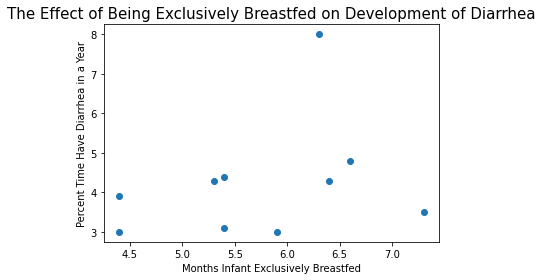

In [196]:
#Create scatter plot, label it, and show it 
plt.scatter(x1r,y1)
plt.xlabel("Months Infant Exclusively Breastfed")
plt.ylabel("Percent Time Have Diarrhea in a Year")
plt.title ("The Effect of Being Exclusively Breastfed on Development of Diarrhea",fontsize=15)
plt.show()

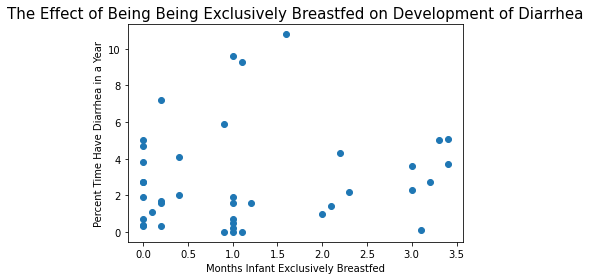

In [197]:
#Create scatter plot, label it, and show it 
plt.scatter(x2r,y2)
plt.xlabel("Months Infant Exclusively Breastfed")
plt.ylabel("Percent Time Have Diarrhea in a Year")
plt.title ("The Effect of Being Being Exclusively Breastfed on Development of Diarrhea",fontsize=15)
plt.show()

### Part 4: Analysis of the Results 

P-Value:
For the general diversity of the microbiome between exclusively breast fed (EBF) and non-exclusively breastfed (NEBF)infants, a p-value of .05 was given. This p-value is equal to the significance value of 0.05. This means that the null hypothesis (Exclusive BF and Non-Exclusive BF have the same diversity) is false, and the alternate hypothesis (Exclusive BF and Non-Exclusive breastfeeding have different ranges of diveristy) is accepted. In regard to the Bacteroidetes and Firmicutes bacterium between EBF and NEBF infants, each of the p-values must be divided by 2 in order to take a one-sided t test. In this case, Bacterioidetes p-value of 0.049/2 = .0245 and Firmicutes p-value of 0.028/2 = 0.014. Btoh of these p-values were less than the significance value of 0.05. This means that in both cases, the null hypothesis (Levels of Bacterioidetes/Firmicutes in EBF infants is greater than or equal to the level of Bacteriodotes/Firmicutes in NEBF infants) is false and the alternate hypothesis is true (Bacterioidetes/Firmicutes levels in EBF infants is less than in NEBF infants). This part of my hypothesis was correct, that the levels of Bacterioidetes/Firmicutes in EBF infants is less than in NEBF infants. 

Deep Neural Network: 
This data was used to show the relation between the gut microbial diversity and the onset of diarrhea or the absence of diarrhea as well. The "loss" value is calculated on subsequent trainings and it implies "how poorly or well a model behaves after each iteration of optimization" (https://intellipaat.com/community/368/how-to-interpret-loss-and-accuracy-for-a-machine-learning-model). If the model is perfect, then the loss would be 0. My model generated a loss value of 0.2781. This is a great loss value and indicates the data points that were predicted were not far off from the true data points. The accuracy data point measures how accurate the model's prediction is compared to the true data that is given. The accuracy of my model was 91.86%. This means out of 100 test samples, my model was able to classify about 92 of them. This keras model took into account the infant was fed breast milk, the infant had solid foods or not, and if the infant was given a second round of solid foods or not. This was then compared against the development of diarrhea or not based on these factors. This model has the ability to predict whether diarrhea will be developed based on these 3 factors. It does not specifically show the difference between breast fed and non-breast fed infants and the development of diarrhea, but it gives more insight into how different factors affect the development of diarrhea dysbiosis. Based on this model alone, it would be only half of the equation to show if breastfeeding had an effect on the development of diarrhea dysbiosis. The scatter plot is then used to further compare the results breastfeeding had on the development of dysbiosis.   

Scatter Plot: 
This plot is not necessarily showing the hypothesis that I had and wanted to be portrayed, but it does show an overall trend. If infant is exclusively breastfed for less months, then the range of the development of diarrhea extends further than non-exclusively breastfed infants. There is still infants who are exclusively breastfed that develop the same percentage of diarrhea in a year as those infants that are not exclusively breastfed, but these cases center around the 4% line, rather than centering around the 7% line in infants who are exclusively breastfed for less than 4 months. Therefore, it can be argued that the range of generation of diarrhea dysbiosis in greater in NEBF infants than EBF infants. The part of my hypothesis ("a reduced amount of gut microbiota diarrhea dysbiosis) should be corrected to a decrease in the range of the percentage of gut microbiota diarrhea dysbioisis.

Overall, the first part of my hypothesis was spot on: The levels of Bacterioidetes and Firmicutes were decreased in EBF infants, however, this led to a decrease in the range of the percentage of gut microbiota diarrhea dysbiosis, rather than a direct decrease in the percentage of gut microbiota diarrhea dysbiosis. 